In [49]:
import numpy as np
import scipy.io.wavfile
import matplotlib.pyplot as plt

# Part function:
At first this function crops n-th part of a signal and then returns 6 frequencies of 6 ranges from 100 to 5000 hz that have the most amount of fourier transform amount .

In [50]:
def part(n,signal,sample_rate):
    ft=np.fft.fft(signal[(n-1)*2048:n*2048])
    frequency=np.fft.fftfreq(2048,1/sample_rate)
    cropped_freq_to_ft=[]
    for i in range(0,2048):
        if frequency[i]>=100 and frequency[i]<=5000:
            cropped_freq_to_ft.append((frequency[i],ft[i]))
    max_ft_list=[]
    max_freq_list=[]
    for i in range(0,6):
        max_ft_list.append(0)
        max_freq_list.append(0)
    for i in range(0,len(cropped_freq_to_ft)):
        freq=cropped_freq_to_ft[i][0]
        ft_amount=cropped_freq_to_ft[i][1]
        if freq>=100 and freq<=916 :
            if ft_amount>max_ft_list[0]:
                max_ft_list[0]=ft_amount
                max_freq_list[0]=freq
        elif freq>916 and freq<=1732 :
            if ft_amount>max_ft_list[1]:
                max_ft_list[1]=ft_amount
                max_freq_list[1]=freq
        elif freq>1732 and freq<=2548 :
            if ft_amount>max_ft_list[2]:
                max_ft_list[2]=ft_amount
                max_freq_list[2]=freq
        elif freq>2548 and freq<=3364 :
            if ft_amount>max_ft_list[3]:
                max_ft_list[3]=ft_amount
                max_freq_list[3]=freq
        elif freq>3364 and freq<=4180 :
            if ft_amount>max_ft_list[4]:
                max_ft_list[4]=ft_amount
                max_freq_list[4]=freq
        elif freq>4180 and freq<=5000 :
            if ft_amount>max_ft_list[5]:
                max_ft_list[5]=ft_amount
                max_freq_list[5]=freq
    return max_freq_list

# column_returner function:
this function gets a list and returns it like a column

In [51]:
def column_returner(x):
    ans=[]
    for i in range(5,-1,-1):
        ans.append([x[i]])
    return ans

# Noiseprint function:
This function creates a matrix which has six rows and n columns .
columns are time ranges and rows are the 6 frequencies

In [52]:
def noiseprint(filename):
    sample_rate,signal=scipy.io.wavfile.read(filename)
    noise_print=np.array(column_returner(part(1,signal,sample_rate)))
    for i in range(2,len(signal)//2048):
        noise_print=np.append(noise_print,column_returner(part(i,signal,sample_rate)),axis=1)
    return noise_print

# Creating a data base for sounds in 'data' folder:
**This may take a few minutes**

In [53]:
database=[]
database.append(("1_prelude.wav",noiseprint("data/1_prelude.wav")))
database.append(("2_love_is_blue.wav",noiseprint("data/2_love_is_blue.wav")))
database.append(("3_chanson_du_toreador.wav",noiseprint("data/3_chanson_du_toreador.wav")))
database.append(("4_el_bimbo.wav",noiseprint("data/4_el_bimbo.wav")))

# Similarity Function (Copied from similarity.py in project files):
This function measures amount of similarity between two songs with their noiseprints

In [54]:
def similarity(song_spec, clip_spec, points_per_slice=6):    
    song_flat = song_spec.flatten()
    clip_flat = clip_spec.flatten()
    
    sim_window_size = points_per_slice - 1
    score = 0
    for anchor in range(clip_flat.shape[0] - points_per_slice):
        anchor_y = anchor % points_per_slice
        sim_window = clip_flat[anchor: anchor+sim_window_size]
        for song_anchor in range(anchor_y, song_flat.shape[0] - points_per_slice - 1, points_per_slice):
            if clip_flat[anchor] == song_flat[song_anchor]:
                if np.count_nonzero((song_flat[song_anchor:song_anchor+sim_window_size] - sim_window) == 0) >= 4:
                    score += 1
    
    score /= song_flat.shape[0]
    return score

# 1.Finding the most similar track to clip1.wav :

In [55]:
max_score=0
max_index=0
clip=noiseprint("clip/clip1.wav")
for i in range(0,4):
    tmp=similarity(database[i][1],clip)
    print("similarity to "+str(database[i][0])+" : "+str(tmp))
    if tmp>max_score:
        max_score=tmp
        max_index=i
print("\nThe most similar is : "+str(database[max_index][0]))

similarity to 1_prelude.wav : 0.0012919896640826874
similarity to 2_love_is_blue.wav : 0.001421188630490956
similarity to 3_chanson_du_toreador.wav : 0.0003875968992248062
similarity to 4_el_bimbo.wav : 0.004392764857881137

The most similar is : 4_el_bimbo.wav


**1.Correctly recognized**

# Noiseprint graph for clip1.wav:

In [56]:
clip.shape

(6, 266)

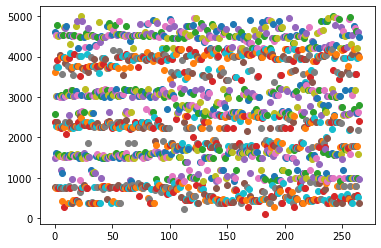

In [57]:
for i in range(0,266):
    for j in range(0,6):
        plt.scatter(i,clip[j][i])

# 2.Finding the most similar track to clip2.wav

In [58]:
max_score=0
max_index=0
clip=noiseprint("clip/clip2.wav")
for i in range(0,4):
    tmp=similarity(database[i][1],clip)
    print("similarity to "+str(database[i][0])+" : "+str(tmp))
    if tmp>max_score:
        max_score=tmp
        max_index=i
print("\nThe most similar is : "+str(database[max_index][0]))

similarity to 1_prelude.wav : 0.003229974160206718
similarity to 2_love_is_blue.wav : 0.0011627906976744186
similarity to 3_chanson_du_toreador.wav : 0.002325581395348837
similarity to 4_el_bimbo.wav : 0.0012919896640826874

The most similar is : 1_prelude.wav


**2.Unfortunatly wrongly recognized . the real similar song is '3_chanson_du_toreador.wav' .
however 3_chanson and 1_prelude have almost same similarity amount and maybe it's just a little bug .**

# Noiseprint graph for clip2.wav:

In [59]:
clip.shape

(6, 242)

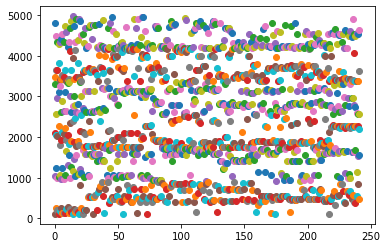

In [60]:
for i in range(0,242):
    for j in range(0,6):
        plt.scatter(i,clip[j][i])

# 3.Finding the most similar track to clip3.wav

In [61]:
max_score=0
max_index=0
clip=noiseprint("clip/clip3.wav")
for i in range(0,4):
    tmp=similarity(database[i][1],clip)
    print("similarity to "+str(database[i][0])+" : "+str(tmp))
    if tmp>max_score:
        max_score=tmp
        max_index=i
print("\nThe most similar is : "+str(database[max_index][0]))

similarity to 1_prelude.wav : 0.009819121447028423
similarity to 2_love_is_blue.wav : 0.0021963824289405686
similarity to 3_chanson_du_toreador.wav : 0.001421188630490956
similarity to 4_el_bimbo.wav : 0.0007751937984496124

The most similar is : 1_prelude.wav


**3.Correctly recognized**

# Noiseprint graph for clip3.wav :

In [62]:
clip.shape

(6, 281)

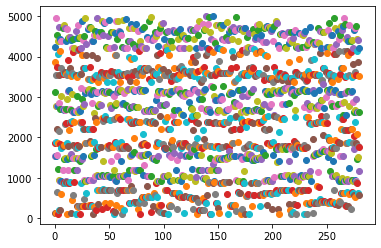

In [63]:
for i in range(0,281):
    for j in range(0,6):
        plt.scatter(i,clip[j][i])